In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Dense,LSTM,Bidirectional
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

In [ ]:
#load_data
(x_train,y_train1),(x_test,y_test1)=fashion_mnist.load_data()
#Normalize_data
x_train=x_train.reshape(60000,28,28).astype('float32')/255
x_test=x_test.reshape(10000,28,28).astype('float32')/255
#to_categorical
y_train=to_categorical(y_train1)
y_test=to_categorical(y_test1)

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
inputs=Input(shape=(28,28)) #input_layer
rnn_layer=Bidirectional(LSTM(128))(inputs)#lstm_layer
outputs=Dense(10,activation='softmax')(rnn_layer)#output_layer
model=Model(inputs,outputs)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=5,batch_size=64)

Epoch 1/5
844/844 [==============================] - 12s 8ms/step - loss: 0.5826 - accuracy: 0.7849 - val_loss: 0.4492 - val_accuracy: 0.8300
Epoch 2/5
844/844 [==============================] - 7s 8ms/step - loss: 0.4034 - accuracy: 0.8505 - val_loss: 0.3806 - val_accuracy: 0.8573
Epoch 3/5
844/844 [==============================] - 6s 7ms/step - loss: 0.3586 - accuracy: 0.8675 - val_loss: 0.3465 - val_accuracy: 0.8655
Epoch 4/5
844/844 [==============================] - 7s 8ms/step - loss: 0.3274 - accuracy: 0.8794 - val_loss: 0.3179 - val_accuracy: 0.8797
Epoch 5/5
844/844 [==============================] - 6s 7ms/step - loss: 0.3079 - accuracy: 0.8868 - val_loss: 0.3077 - val_accuracy: 0.8843


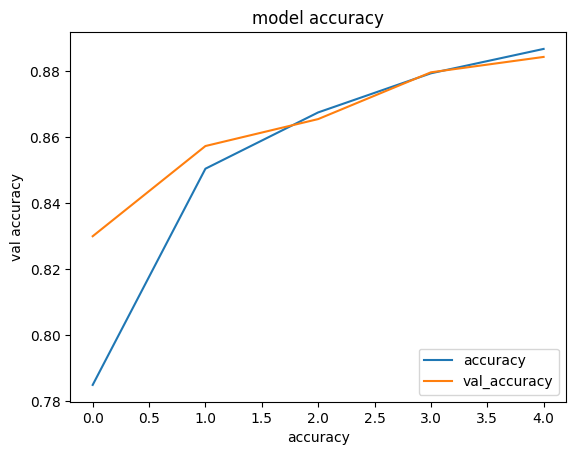

In [ ]:
#model_accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('val accuracy')
plt.legend(['accuracy','val_accuracy'],loc='lower right')
plt.show()

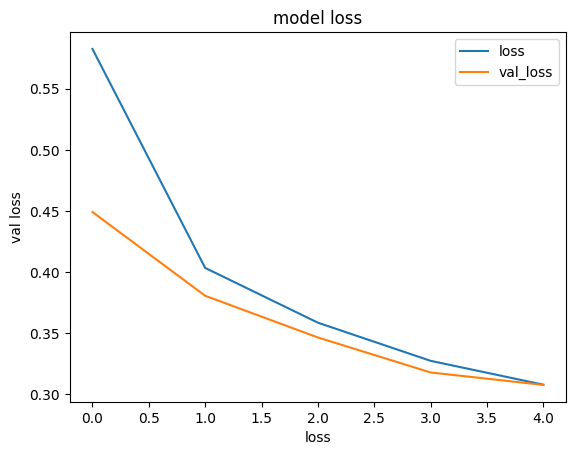

In [ ]:
#model_loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('val loss')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 2s 3ms/step


In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
#accuracy_score
accuracy_score(y_test1,y_pred)

0.8797